In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def generate_linear(n=100):
    pts=np.random.uniform(0,1,(n,2))
    inputs=[]
    labels=[]
    for pt in pts:
        inputs.append([pt[0],pt[1]])
        distance=(pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs) , np.array(labels).reshape(n,1)

def generate_XOR_easy():
    inputs=[]
    labels=[]
    
    for i in range(11):
        inputs.append([0.1*i,0.1*i])
        labels.append(0)
        if(0.1*i==0.5):
            continue
        inputs.append([0.1*i,1-0.1*i])
        labels.append(1)
    return np.array(inputs) , np.array(labels).reshape(21,1)

def show_result(x,y,pred_y):
    plt.subplot(1,2,1)
    plt.title('Ground truth',fontsize=18)
    for i in range(x.shape[0]):
        if(y[i]==0):
            plt.plot(x[i][0],x[i][1],'ro')
        else:
            plt.plot(x[i][0],x[i][1],'bo')
    plt.subplot(1,2,2)
    plt.title('Predict result',fontsize=18)
    for i in range(x.shape[0]):
        if(pred_y[i]==0):
            plt.plot(x[i][0],x[i][1],'ro')
        else:
            plt.plot(x[i][0],x[i][1],'bo')
    plt.show()
    
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x,1.0-x)

In [4]:
class Network():
    def __init__(self,inputShape=2,outputShape=1,hiddenLayer=2,hiddenShape=[10,10],lr=0.05,bias=True):
        self.inputShape=inputShape
        self.outputShape=outputShape
        self.hiddenLayer=hiddenLayer
        self.hiddenShape=hiddenShape
        self.lr=lr
        self.weight,self.biasWeight=self.initWeight()
        
        if bias==True:
            self.bias=np.ones(1+hiddenLayer)
        else:
            self.bias=np.zeros(1+hiddenLayer)
        
        
    def initWeight(self):
        layers=2+self.hiddenLayer
        weight=[]
        biasWeight=[]
        lastLayer=self.inputShape
        for i in range(self.hiddenLayer):
            weight.append(np.random.randn(lastLayer,self.hiddenShape[i]))
            biasWeight.append(np.random.randn(self.hiddenShape[i]))

            lastLayer=self.hiddenShape[i]
        weight.append(np.random.randn(lastLayer,self.outputShape))
        biasWeight.append(np.random.randn(self.outputShape))
       
        return weight , biasWeight
     
    def forward(self,x):
        self.y=[]
        _x=x
        self.y.append(_x)
        for i in range(len(self.weight)):
            if(_x.shape[-1]!=self.weight[i].shape[0]):
                print("In layer %d , dim %d and dim %d does not match" %(i,_x.shape[-1],self.weight[i].shape[0]))
            _x=sigmoid(_x@self.weight[i]+self.bias[i]*self.biasWeight[i])
            self.y.append(_x)
        return np.array(self.y)
    
    def backward(self,loss): 
        delta=(loss)*derivative_sigmoid(self.y[-1])
        for i in range(1,len(self.weight)+1):
            tmp=delta.copy()
            delta=(delta@self.weight[-i].transpose())*derivative_sigmoid(self.y[-i-1])
            self.weight[-i]=self.weight[-i]-self.lr*(self.y[-i-1].reshape(-1,1)@tmp.reshape(1,-1))
            self.biasWeight[-i]=self.biasWeight[-i]-self.lr*tmp

            

epoch0 : [51.96775381]


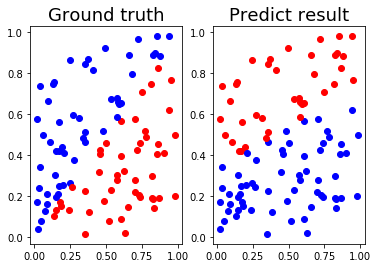

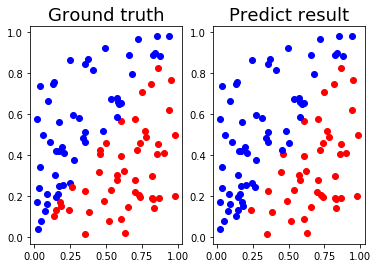

epoch200 : [17.5886807]


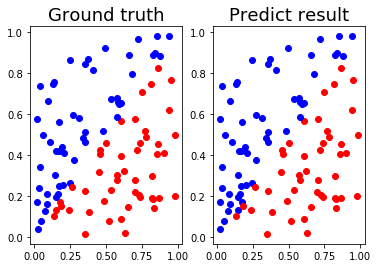

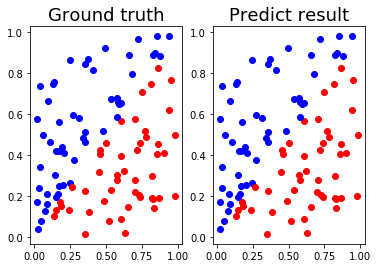

epoch400 : [9.26329382]


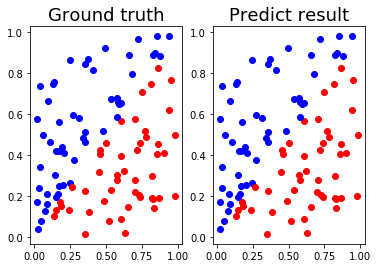

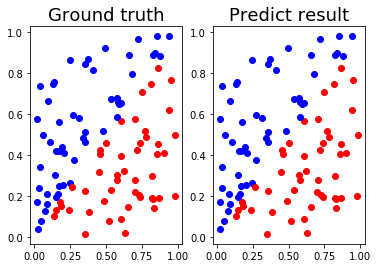

epoch600 : [6.25490064]


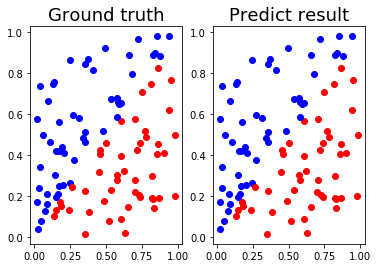

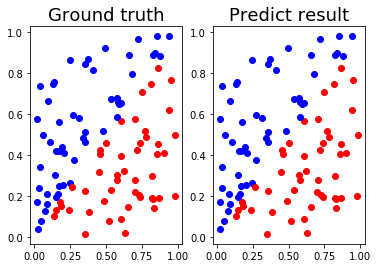

epoch800 : [4.71541179]


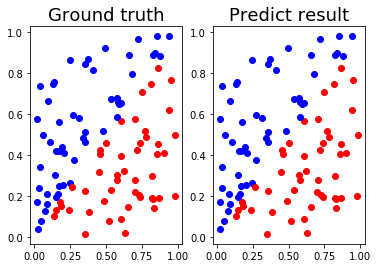

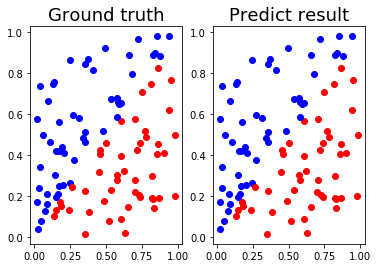

epoch1000 : [3.78776348]


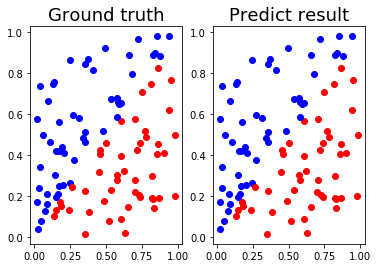

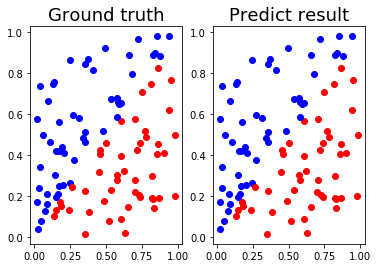

epoch1200 : [3.16987649]


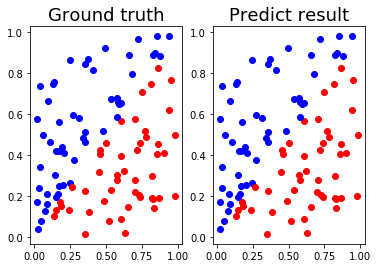

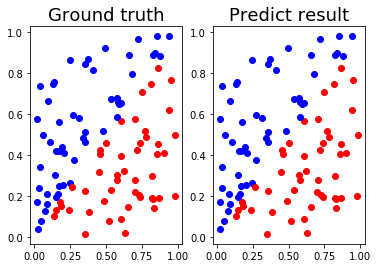

epoch1400 : [2.7301195]


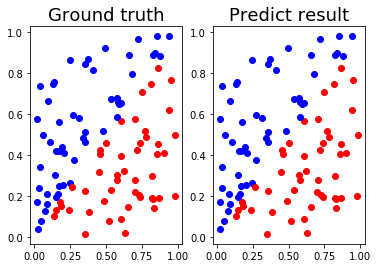

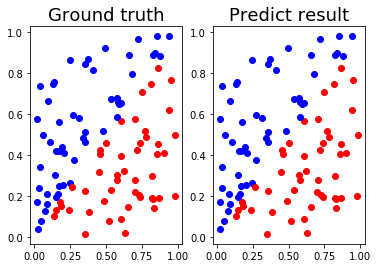

epoch1600 : [2.40183042]


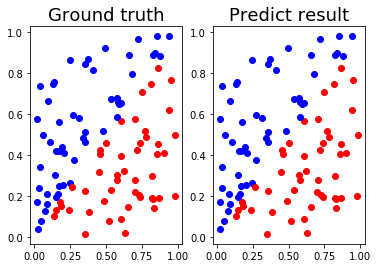

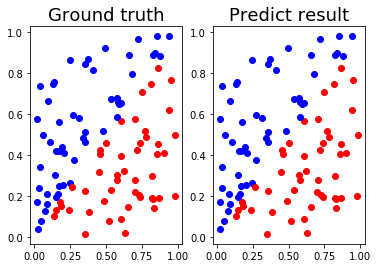

epoch1800 : [2.14762905]


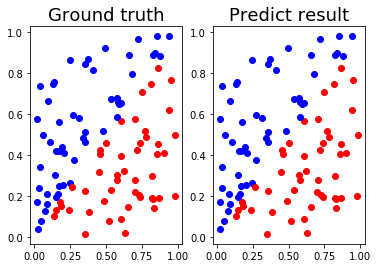

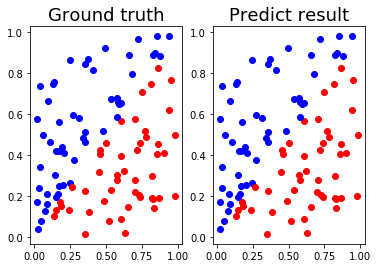

In [5]:
inputs,labels=generate_linear()
model=Network(hiddenShape=[4,4],lr=0.05,bias=False)
epoch=2000

for i in range(epoch):
    loss=0
    for j in range(inputs.shape[0]):
        x=np.array(inputs[j])
        y=np.array(labels[j])
        _y=model.forward(x)
        model.backward(_y[-1]-y)
        loss+=np.abs(_y[-1]-y)
    if i%100==0:
        if i%200==0:
            print('epoch'+str(i)+" : "+str(loss))
        ans=[]
        for j in range(inputs.shape[0]):
            x=np.array(inputs[j])
            _y=model.forward(x)
            ans.append(_y[-1])
        ans=np.array(ans)

        for i in range(len(ans)):
            if ans[i]>=0.5:
                ans[i]=1
            else:
                ans[i]=0
        show_result(inputs,labels,ans)

[[0.98  0.999 0.999 0.    1.    0.    0.    1.    0.998 0.   ]
 [1.    1.    0.011 0.    1.    0.999 0.999 0.    1.    0.144]
 [0.037 0.983 0.996 1.    0.044 1.    1.    0.087 0.909 0.993]
 [0.845 0.    0.978 0.87  1.    0.    0.    1.    0.85  0.   ]
 [1.    0.693 0.    0.    1.    0.    1.    0.307 0.    0.   ]
 [0.988 0.    1.    0.    0.    0.075 0.    0.    0.    0.   ]
 [1.    0.    0.999 0.    0.    0.991 0.997 0.    0.    1.   ]
 [1.    0.999 0.    1.    0.989 1.    0.    1.    0.993 0.999]
 [0.997 0.999 0.    0.    0.    0.979 0.006 1.    0.    0.995]
 [0.034 0.    0.999 0.    0.041 0.053 0.    0.099 1.    0.999]]
[[0.98 ]
 [0.999]
 [0.999]
 [0.   ]
 [1.   ]
 [0.   ]
 [0.   ]
 [1.   ]
 [0.998]
 [0.   ]
 [1.   ]
 [1.   ]
 [0.011]
 [0.   ]
 [1.   ]
 [0.999]
 [0.999]
 [0.   ]
 [1.   ]
 [0.144]
 [0.037]
 [0.983]
 [0.996]
 [1.   ]
 [0.044]
 [1.   ]
 [1.   ]
 [0.087]
 [0.909]
 [0.993]
 [0.845]
 [0.   ]
 [0.978]
 [0.87 ]
 [1.   ]
 [0.   ]
 [0.   ]
 [1.   ]
 [0.85 ]
 [0.   ]
 [1.   ]


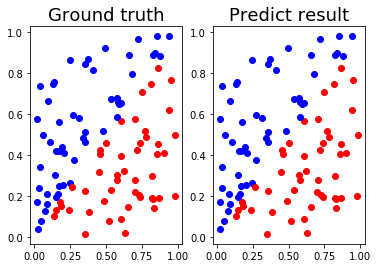

In [6]:
ans=[]
for j in range(inputs.shape[0]):
    x=np.array(inputs[j])
    _y=model.forward(x)
    ans.append(_y[-1])

print(np.around(np.array(ans).reshape(10,10),3))
    

ans=np.array(ans)

print(np.around(ans,3))
for i in range(len(ans)):
    if ans[i]>=0.5:
        ans[i]=1
    else:
        ans[i]=0
show_result(inputs,labels,ans)

[[1. 1. 0. 1. 1. 1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 1. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 1. 1. 1. 1. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 0. 0. 1. 1.]]


In [20]:
inputs,labels=generate_XOR_easy()
model=Network(hiddenShape=[10,10],lr=0.05,bias=False)
epoch=4000

for i in range(epoch):
    loss=0
    for j in range(inputs.shape[0]):
        x=np.array(inputs[j])
        y=np.array(labels[j])
        _y=model.forward(x)
        model.backward(_y[-1]-y)
        loss+=np.abs(_y[-1]-y)
    #print(loss)
    if i%500==0:
        print('epoch'+str(i)+" : "+str(loss))
        
        ans=[]
        print(i)
        for j in range(inputs.shape[0]):
            x=np.array(inputs[j])
            _y=model.forward(x)
            ans.append(_y[-1])
        ans=np.array(ans)

        for i in range(len(ans)):
            if ans[i]>=0.5:
                ans[i]=1
            else:
                ans[i]=0
        show_result(inputs,labels,ans)
    

epoch0 : [10.53521193]
epoch500 : [9.72698758]
epoch1000 : [7.62538768]
epoch1500 : [4.55265842]
epoch2000 : [3.11801741]
epoch2500 : [2.23787934]
epoch3000 : [1.62828988]
epoch3500 : [1.24372851]


[[0.014]
 [0.972]
 [0.042]
 [0.974]
 [0.095]
 [0.973]
 [0.155]
 [0.956]
 [0.194]
 [0.694]
 [0.199]
 [0.177]
 [0.66 ]
 [0.143]
 [0.948]
 [0.107]
 [0.981]
 [0.077]
 [0.989]
 [0.054]
 [0.992]]


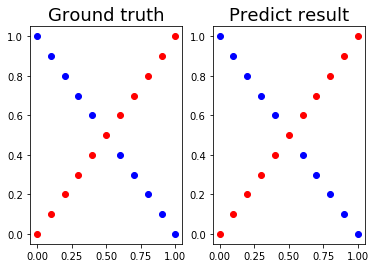

In [15]:
ans=[]
for j in range(inputs.shape[0]):
    x=np.array(inputs[j])
    _y=model.forward(x)
    ans.append(_y[-1])

ans=np.array(ans)
print(np.around(ans,3))
for i in range(len(ans)):
    if ans[i]>=0.5:
        ans[i]=1
    else:
        ans[i]=0
show_result(inputs,labels,ans)

In [13]:
for i in range(len(model.weight)):
    print(model.weight[i].shape)

(2, 20)
(20, 20)
(20, 1)
